## **PROJECT TITLE**

# **House Prices - Advanced Regression Techniques**

**Stage 1**

**1.Brain Storm :**

This dataset has details about houses such as their size, quality, age, and location. It is taken from Kaggle’s **“House Prices - Advanced Regression Techniques”** competition dataset

**2.Dataset :**

Source: Kaggle Competition dataset – House Prices: Advanced Regression Techniques

Key Columns: Id, MSSubClass, MSZoning, LotArea, OverallQual, OverallCond, YearBuilt, GrLivArea, GarageCars, SalePrice (Target)

Timeline: The dataset has house information from different years in a U.S. town.

Location: Kaggle


**3.Problem Statment :**

House prices depend on many things like size, quality, age, and neighborhood. Predicting prices is not easy. This project uses machine learning models to find the selling price of a house using the given house details.


**4.Domain :**

Real Estate / Price Prediction

**5.Objective :**

This dataset contains 79 explanatory variables that describe different details of houses. The objective of this project is to build and compare multiple machine learning models — including Linear Regression, Decision Tree, and Random Forest — to predict the final sale price (SalePrice) of a house.

**6.Outcome :**

Sample Input Features: LotArea, OverallQual, YearBuilt, GrLivArea, GarageCars, TotalBsmtSF, Neighborhood, KitchenQual

Sample Output: Predicted House Sale Price

**7.Algorithms to be Used**



*   Linear Regression
*   Decision Tree Regressor
*   Random Forest Regressor
*   Support Vector Regressor (SVR)





**8.Feature Explanation**

**a) Numerical Features**



*   OverallQual - MAterial Rates and Finish (1 to 10)
*   GrLivArea - Size of living area above ground (sq ft)
*   GarageCars - Number of cars the garage can hold
*   GarageArea - Garage area in sq ft
*   TotalBsmtSF - Size of the basement in sq ft
*   1stFlrSF - First floor area in sq ft
*   FullBath - Number of full bathrooms
*   TotRmsAbvGrd - Total number of rooms above ground
*   YearBuilt - Year when the house was built
*   YearRemodAdd - Year when the house was remodeled

**b) Categorical Features**


*   Neighborhood - Area or location of the house
*   MSZoning - Zoning classification of the land
*   HouseStyle - Type of house
*   Exterior1st - Type of exterior wall covering
*   KitchenQual - Kitchen quality rating (Excellent, Good, Average, Fair)
*   SaleCondition - Sale condition (Normal, Abnormal, Partial)


**c) Target Variable**

SalePrice – The selling price of the house

**INITIAL EDA()**

**Import library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder , OrdinalEncoder

**Load Dataset**

In [ ]:
url = "https://raw.githubusercontent.com/karthikeyan191091m/House-Prices---Advanced-Regression-Techniques/refs/heads/main/House%20Price%20Advanced%20Train%20Dataset-New.csv"
HP_df = pd.read_csv(url)

**Finding Head**

In [ ]:
HP_df.head(3)

,Id,MSSubClass,MSZoning,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,KitchenQual,TotRmsAbvGrd,GarageCars,GarageArea,SaleCondition,SalePrice
0,1,60,RL,CollgCr,2Story,7,5,2003,2003,VinylSd,...,856,854,1710,1,Gd,8,2,548,Normal,208500
1,2,20,RL,Veenker,1Story,6,8,1976,1976,MetalSd,...,1262,0,1262,0,TA,6,2,460,Normal,181500
2,3,60,RL,CollgCr,2Story,7,5,2001,2002,VinylSd,...,920,866,1786,1,Gd,6,2,608,Normal,223500


**Finding Tail**

In [ ]:
HP_df.tail(3)

,Id,MSSubClass,MSZoning,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,KitchenQual,TotRmsAbvGrd,GarageCars,GarageArea,SaleCondition,SalePrice
1457,1458,70,RL,Crawfor,2Story,7,9,1941,2006,CemntBd,...,1188,1152,2340,0,Gd,9,1,252,Normal,266500
1458,1459,20,RL,NAmes,1Story,5,6,1950,1996,MetalSd,...,1078,0,1078,1,Gd,5,1,240,Normal,142125
1459,1460,20,RL,Edwards,1Story,5,6,1965,1965,HdBoard,...,1256,0,1256,1,TA,6,1,276,Normal,147500


**Finding Data Shape**

In [ ]:
HP_df.shape

(1460, 21)

**Display Column Names**

In [ ]:
print('Column',HP_df.columns)

Column Index(['Id', 'MSSubClass', 'MSZoning', 'Neighborhood', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageCars',
       'GarageArea', 'SaleCondition', 'SalePrice'],
      dtype='object')


**Finding Datatype**

In [ ]:
HP_df_datatype = HP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   Neighborhood   1460 non-null   object
 4   HouseStyle     1460 non-null   object
 5   OverallQual    1460 non-null   int64 
 6   OverallCond    1460 non-null   int64 
 7   YearBuilt      1460 non-null   int64 
 8   YearRemodAdd   1460 non-null   int64 
 9   Exterior1st    1460 non-null   object
 10  TotalBsmtSF    1460 non-null   int64 
 11  1stFlrSF       1460 non-null   int64 
 12  2ndFlrSF       1460 non-null   int64 
 13  GrLivArea      1460 non-null   int64 
 14  BsmtFullBath   1460 non-null   int64 
 15  KitchenQual    1460 non-null   object
 16  TotRmsAbvGrd   1460 non-null   int64 
 17  GarageCars     1460 non-null   int64 
 18  GarageArea     1460 non-null

**Finding Sum Value**

In [ ]:
HP_df.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
Neighborhood,0
HouseStyle,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0


**Display Null Values**

In [ ]:
HP_df.isnull()

,Id,MSSubClass,MSZoning,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,KitchenQual,TotRmsAbvGrd,GarageCars,GarageArea,SaleCondition,SalePrice
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(HP_df.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
Neighborhood     0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
Exterior1st      0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
KitchenQual      0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
SaleCondition    0
SalePrice        0
dtype: int64


**Display Numarical Column Names**

In [ ]:
Numarical_Column = HP_df.select_dtypes(include=['int64','float64']).columns
print('Numarical Column',Numarical_Column)

Numarical Column Index(['Id', 'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


**Display Categorical Column Names**

In [ ]:
Categorical_Column = HP_df.select_dtypes(include=['object']).columns
print('Categorical Column',Categorical_Column)

Categorical Column Index(['MSZoning', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'KitchenQual',
       'SaleCondition'],
      dtype='object')


**Finding Mean Values**

In [ ]:
HP_df.isnull().mean()

,0
Id,0.0
MSSubClass,0.0
MSZoning,0.0
Neighborhood,0.0
HouseStyle,0.0
OverallQual,0.0
OverallCond,0.0
YearBuilt,0.0
YearRemodAdd,0.0
Exterior1st,0.0


**Describe all Values**

In [ ]:
HP_df.describe(include='all')

,Id,MSSubClass,MSZoning,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,KitchenQual,TotRmsAbvGrd,GarageCars,GarageArea,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,...,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460.000000,1460.000000,1460,1460.000000
unique,NaN,NaN,5,25,8,NaN,NaN,NaN,NaN,15,...,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,6,NaN
top,NaN,NaN,RL,NAmes,1Story,NaN,NaN,NaN,NaN,VinylSd,...,NaN,NaN,NaN,NaN,TA,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,1151,225,726,NaN,NaN,NaN,NaN,515,...,NaN,NaN,NaN,NaN,735,NaN,NaN,NaN,1198,NaN
mean,730.500000,56.897260,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,...,1162.626712,346.992466,1515.463699,0.425342,NaN,6.517808,1.767123,472.980137,NaN,180921.195890
std,421.610009,42.300571,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,...,386.587738,436.528436,525.480383,0.518911,NaN,1.625393,0.747315,213.804841,NaN,79442.502883
min,1.000000,20.000000,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,...,334.000000,0.000000,334.000000,0.000000,NaN,2.000000,0.000000,0.000000,NaN,34900.000000
25%,365.750000,20.000000,NaN,NaN,NaN,5.000000,5.000000,1954.000000,1967.000000,NaN,...,882.000000,0.000000,1129.500000,0.000000,NaN,5.000000,1.000000,334.500000,NaN,129975.000000
50%,730.500000,50.000000,NaN,NaN,NaN,6.000000,5.000000,1973.000000,1994.000000,NaN,...,1087.000000,0.000000,1464.000000,0.000000,NaN,6.000000,2.000000,480.000000,NaN,163000.000000
75%,1095.250000,70.000000,NaN,NaN,NaN,7.000000,6.000000,2000.000000,2004.000000,NaN,...,1391.250000,728.000000,1776.750000,1.000000,NaN,7.000000,2.000000,576.000000,NaN,214000.000000


**Interpretation**

In this project, the dataset is first loaded for analysis. The structure of the dataset is examined to understand the total number of rows, columns, and the data types of each feature.
Next, the numerical columns, such as area measurements, number of rooms, and construction year, are identified, followed by the categorical columns, which represent categories like zoning type, building style, and neighborhood.
After identifying these columns, the head (first few rows) and tail (last few rows) of the dataset are displayed to get an initial understanding of the data.
This helps in gaining a preliminary overview of how the dataset is organized and the kind of information available for predicting house prices.

# **Stage 2**

**EDA (Visualization) and Pre-processing**



**Handling Missing Values**

In [ ]:
HP_df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
Neighborhood,0
HouseStyle,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0


In [ ]:
HP_df.isnull()

,Id,MSSubClass,MSZoning,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,KitchenQual,TotRmsAbvGrd,GarageCars,GarageArea,SaleCondition,SalePrice
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


No Missing Values

**Handling Duplicates**

In [ ]:
HP_df_Duplicate = HP_df.duplicated()
print(HP_df_Duplicate)

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool


No Duplicates

**Finding Outliers**

Before Removing Outlier Dataset Shape

In [ ]:
numerical_cols = HP_df.select_dtypes(include=[np.number]).columns
print('Shape before removing outlier',HP_df.shape)

Shape before removing outlier (1460, 21)


In [ ]:
numeric_cols = HP_df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", numeric_cols)

Numeric columns: Index(['Id', 'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


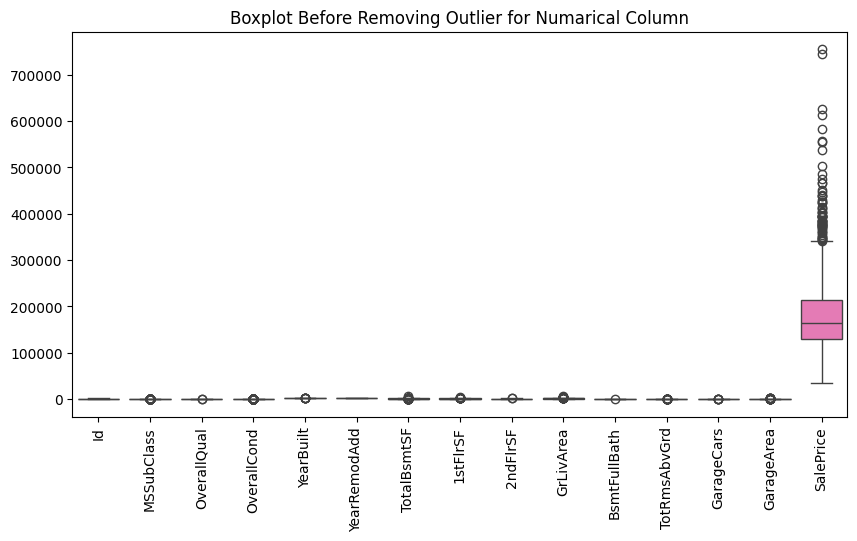

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=HP_df[numeric_cols])
plt.title("Boxplot Before Removing Outlier for Numarical Column")
plt.xticks(rotation=90)
plt.show()

In [ ]:
for col in HP_df.select_dtypes(include=['int64', 'float64']):
    Q1 = HP_df[col].quantile(0.25)
    Q3 = HP_df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"{col} → IQR = {IQR}")

Id → IQR = 729.5
MSSubClass → IQR = 50.0
OverallQual → IQR = 2.0
OverallCond → IQR = 1.0
YearBuilt → IQR = 46.0
YearRemodAdd → IQR = 37.0
TotalBsmtSF → IQR = 502.5
1stFlrSF → IQR = 509.25
2ndFlrSF → IQR = 728.0
GrLivArea → IQR = 647.25
BsmtFullBath → IQR = 1.0
TotRmsAbvGrd → IQR = 2.0
GarageCars → IQR = 1.0
GarageArea → IQR = 241.5
SalePrice → IQR = 84025.0


In [ ]:
lower_band = Q1-1.5 * IQR
lower_band

np.float64(3937.5)

In [ ]:
upper_band = Q3 + 1.5 * IQR
upper_band

np.float64(340037.5)

In [ ]:
HP_df_Remove = HP_df[(HP_df[col] >= lower_band) & (HP_df[col] <= upper_band)]
HP_df_Remove

,Id,MSSubClass,MSZoning,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,KitchenQual,TotRmsAbvGrd,GarageCars,GarageArea,SaleCondition,SalePrice
0,1,60,RL,CollgCr,2Story,7,5,2003,2003,VinylSd,...,856,854,1710,1,Gd,8,2,548,Normal,208500
1,2,20,RL,Veenker,1Story,6,8,1976,1976,MetalSd,...,1262,0,1262,0,TA,6,2,460,Normal,181500
2,3,60,RL,CollgCr,2Story,7,5,2001,2002,VinylSd,...,920,866,1786,1,Gd,6,2,608,Normal,223500
3,4,70,RL,Crawfor,2Story,7,5,1915,1970,Wd Sdng,...,961,756,1717,1,Gd,7,3,642,Abnorml,140000
4,5,60,RL,NoRidge,2Story,8,5,2000,2000,VinylSd,...,1145,1053,2198,1,Gd,9,3,836,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,Gilbert,2Story,6,5,1999,2000,VinylSd,...,953,694,1647,0,TA,7,2,460,Normal,175000
1456,1457,20,RL,NWAmes,1Story,6,6,1978,1988,Plywood,...,2073,0,2073,1,TA,7,2,500,Normal,210000
1457,1458,70,RL,Crawfor,2Story,7,9,1941,2006,CemntBd,...,1188,1152,2340,0,Gd,9,1,252,Normal,266500
1458,1459,20,RL,NAmes,1Story,5,6,1950,1996,MetalSd,...,1078,0,1078,1,Gd,5,1,240,Normal,142125


**After Removing Outlier Dataset Shape**

In [ ]:
HP_df_Remove.shape

(1399, 21)

**Boxplot After Removing Outlier for Numarical Column**

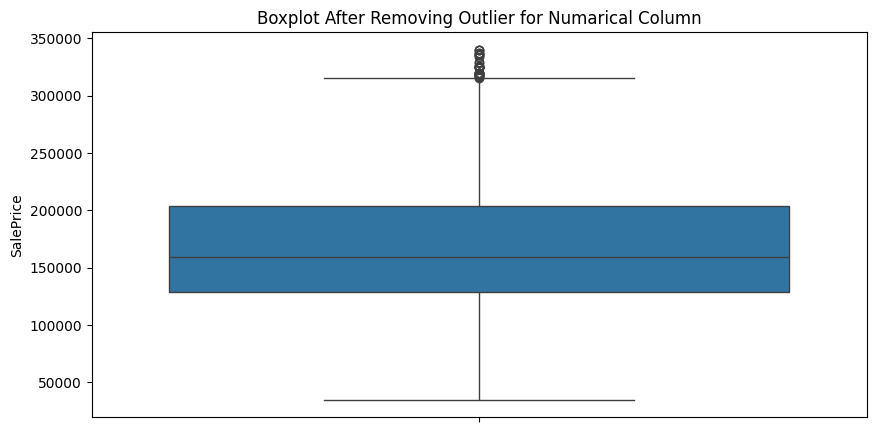

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=HP_df_Remove[col])
plt.title("Boxplot After Removing Outlier for Numarical Column")
plt.xticks(rotation=90)
plt.show()

**Finding Skewness**

In [ ]:
Skewness = HP_df[numeric_cols].skew()
print(Skewness)

Id              0.000000
MSSubClass      1.407657
OverallQual     0.216944
OverallCond     0.693067
YearBuilt      -0.613461
YearRemodAdd   -0.503562
TotalBsmtSF     1.524255
1stFlrSF        1.376757
2ndFlrSF        0.813030
GrLivArea       1.366560
BsmtFullBath    0.596067
TotRmsAbvGrd    0.676341
GarageCars     -0.342549
GarageArea      0.179981
SalePrice       1.882876
dtype: float64


**Visualize skewness**

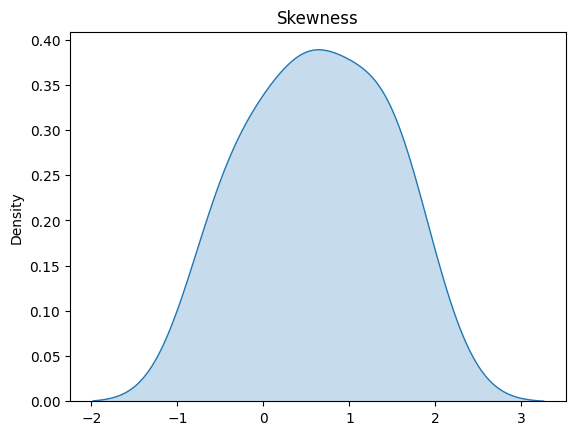

In [ ]:
plt.figure.figsize=(14,7)
sns.kdeplot(data=Skewness,fill=True)
plt.title("Skewness")
plt.show()

In [ ]:
HP_df['Sale_Price_Log'] = np.log(HP_df['SalePrice'])

In [ ]:
from scipy.stats import skew,kurtosis

**Before Skew**

In [ ]:
print('Skewness :',skew(HP_df['SalePrice']))

Skewness : 1.880940746034036


**After Skwe**

In [ ]:
print('Skewness :',skew(HP_df['Sale_Price_Log']))

Skewness : 0.1212103673013655


**Before Kurtosis**

In [ ]:
print('Kurtosos:',kurtosis(HP_df['SalePrice']))

Kurtosos: 6.509812011089439


**After Kurtosis**

In [ ]:
print('Kurtosos:',kurtosis(HP_df['Sale_Price_Log']))

Kurtosos: 0.8026555069117713


In [ ]:
HP_df['Sale_Price_Log'] = np.log(HP_df['SalePrice'])

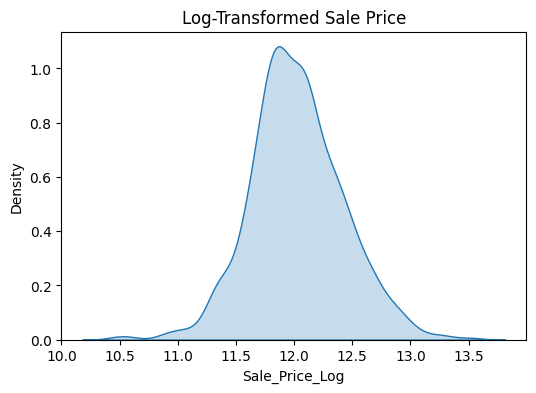

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(HP_df['Sale_Price_Log'],fill=True)
plt.title('Log-Transformed Sale Price')
plt.show()

**Visualization**

**Univariate**

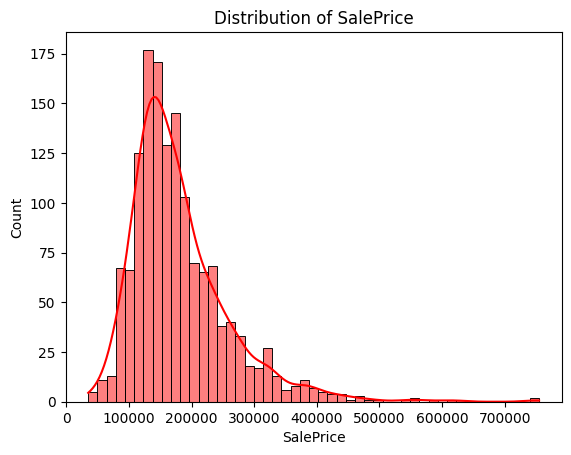

In [ ]:
sns.histplot(HP_df['SalePrice'], kde=True,color = 'Red')
plt.title("Distribution of SalePrice")
plt.show()

**Interpretation**

SalePrice is the target variable of the project — we are trying to predict it.
Understanding its distribution is very important before building any regression model and We can see that SalePrice is right-skewed, meaning most houses are moderately priced, and a few have very high prices

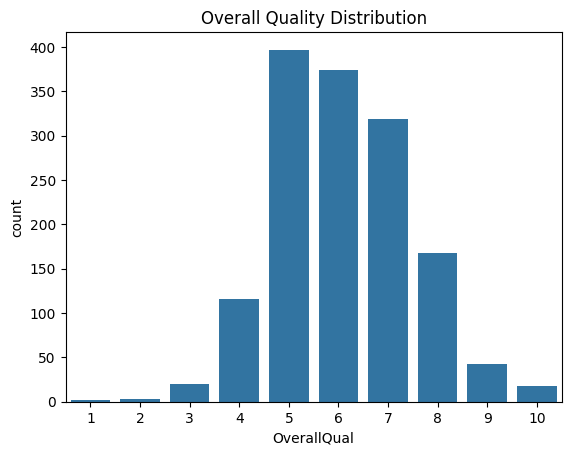

In [ ]:
sns.countplot(x='OverallQual', data=HP_df)
plt.title("Overall Quality Distribution")
plt.show()

**Interpretation**

OverallQual (Overall Quality) this represents the overall material and finish quality of a house . This helps understand the data balance rating (low or high)

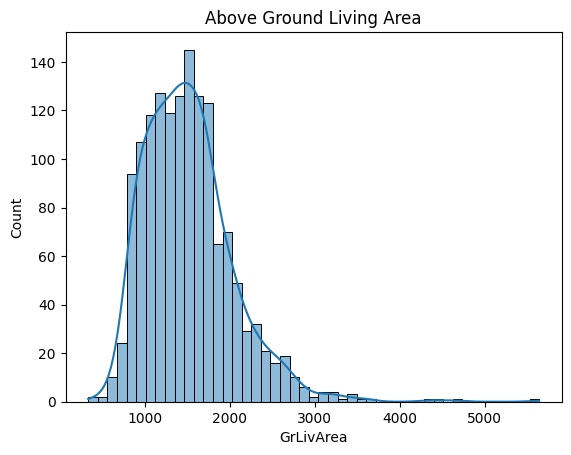

In [ ]:
sns.histplot(HP_df['GrLivArea'], kde=True)
plt.title("Above Ground Living Area")
plt.show()

**Interpretation**

GrLivArea shows the total living area above ground in square feet, which directly affects the selling price.
It’s one of the key features of property value

**Bivariate**

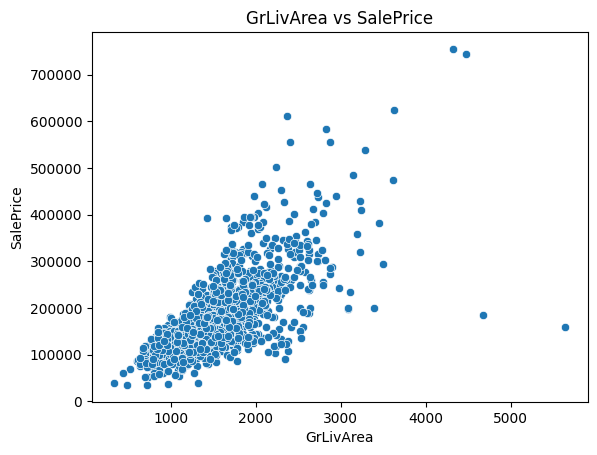

In [ ]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=HP_df)
plt.title("GrLivArea vs SalePrice")
plt.show()

**Interpretation**

GrLivArea (Above Ground Living Area) is a continuous numerical feature this will the total square feet of living space.We can find the size of the house affects its sale price.

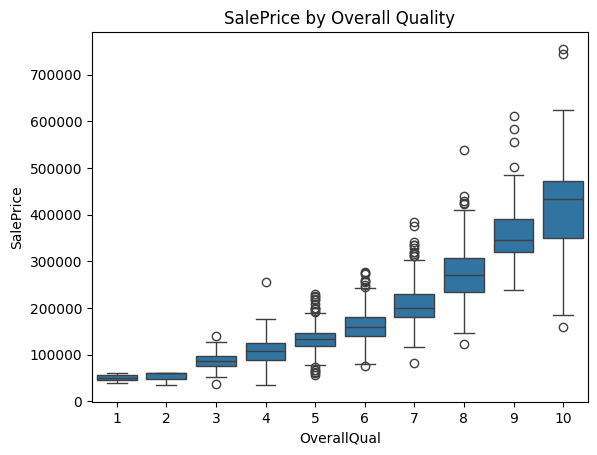

In [ ]:
sns.boxplot(x='OverallQual', y='SalePrice', data=HP_df)
plt.title("SalePrice by Overall Quality")
plt.show()

**Interpretation**

The chart shows that SalePrice increases consistently as OverallQual improves.
Homes with higher quality ratings command significantly higher prices.

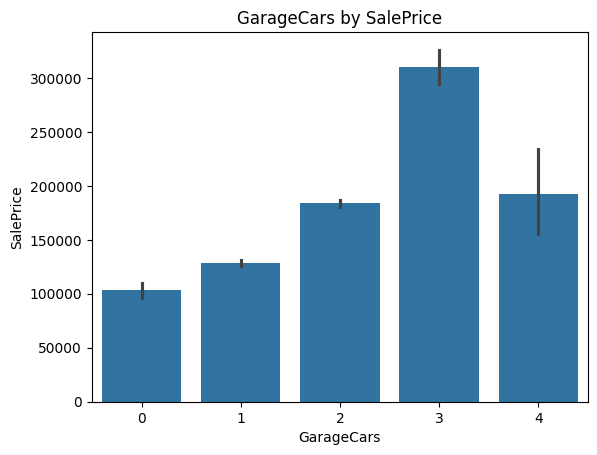

In [ ]:
sns.barplot(x='GarageCars', y='SalePrice', data=HP_df)
plt.title("GarageCars by SalePrice")
plt.show()

**Interpretation**

The bar plot shows that houses with more garage spaces generally have higher sale prices. to show the average sale price for each garage capacity

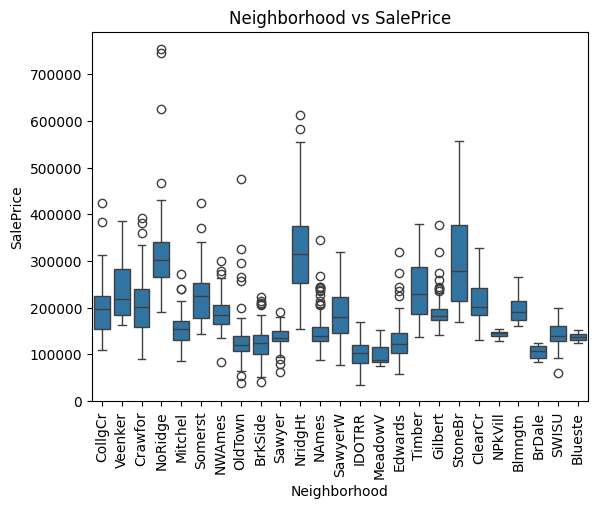

In [ ]:
sns.boxplot(x='Neighborhood', y='SalePrice', data=HP_df)
plt.xticks(rotation=90)
plt.title("Neighborhood vs SalePrice")
plt.show()

**Interpretation**

This boxplot confirms that location plays a significant role in determining house price, and should be included as a categorical predictor in the model to analyze how location affects property value

**Multivariate**

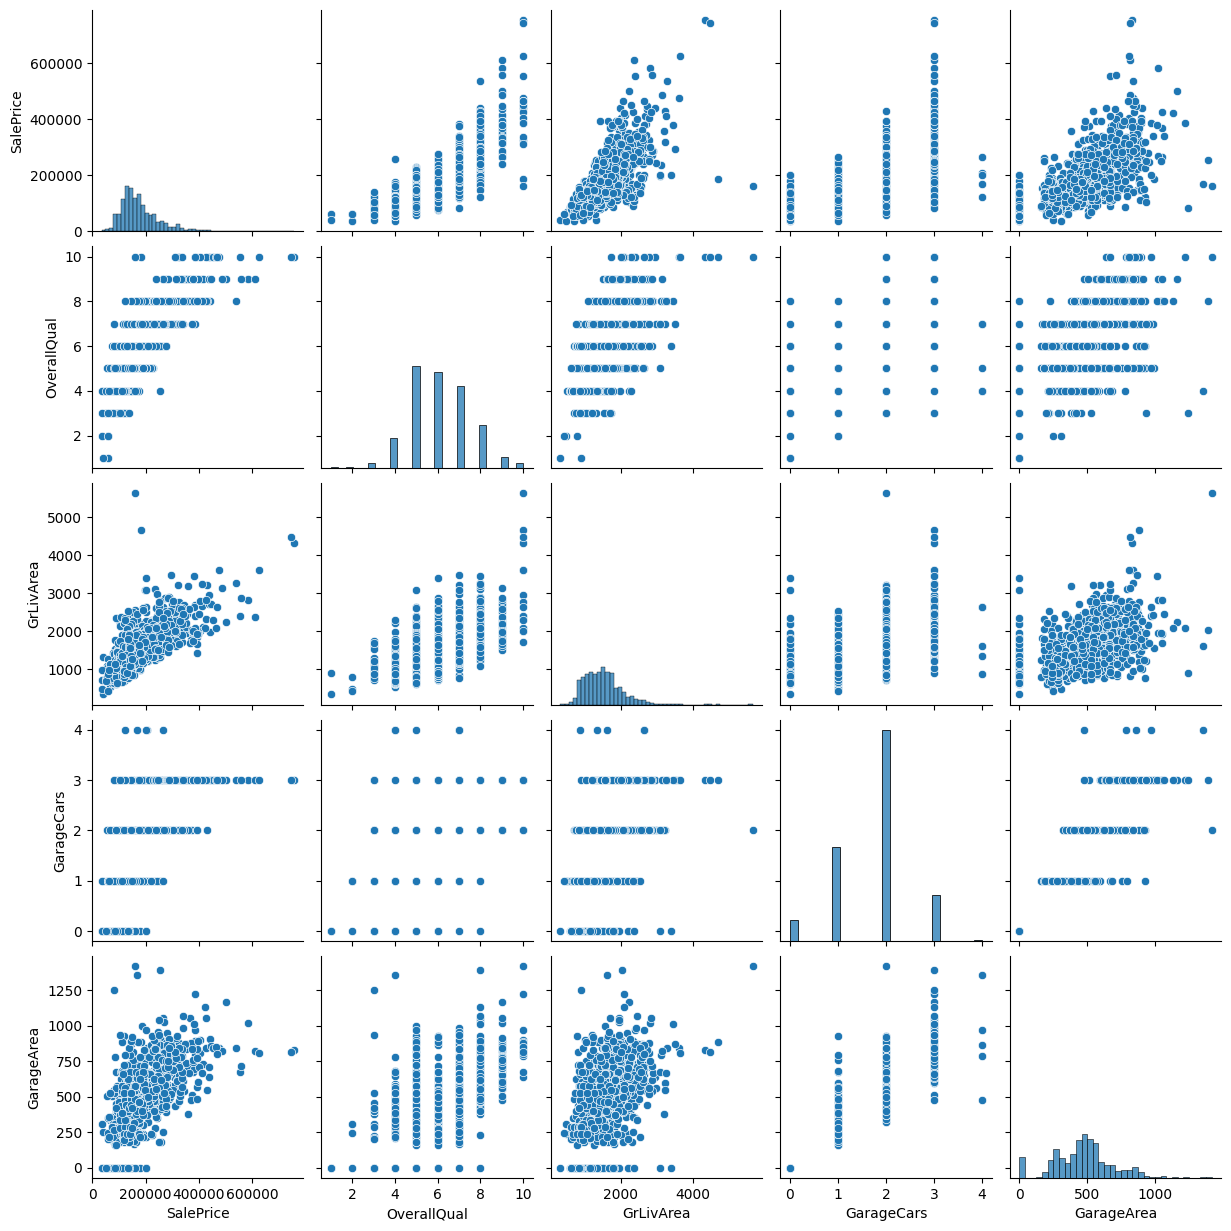

In [ ]:
top_corr = HP_df[numeric_cols].corr()['SalePrice'].sort_values(ascending=False).head(5).index
sns.pairplot(HP_df[top_corr])
plt.show()

**Interpretation**

This pairplot shows the relationships among the top 5 features most correlated with SalePrice.
We can see that OverallQual, GrLivArea, and GarageCars have strong positive relationships with price.
It helps identify how these key variables move together and influence the final sale price

In [ ]:
print(HP_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1460 non-null   int64  
 1   MSSubClass      1460 non-null   int64  
 2   MSZoning        1460 non-null   object 
 3   Neighborhood    1460 non-null   object 
 4   HouseStyle      1460 non-null   object 
 5   OverallQual     1460 non-null   int64  
 6   OverallCond     1460 non-null   int64  
 7   YearBuilt       1460 non-null   int64  
 8   YearRemodAdd    1460 non-null   int64  
 9   Exterior1st     1460 non-null   object 
 10  TotalBsmtSF     1460 non-null   int64  
 11  1stFlrSF        1460 non-null   int64  
 12  2ndFlrSF        1460 non-null   int64  
 13  GrLivArea       1460 non-null   int64  
 14  BsmtFullBath    1460 non-null   int64  
 15  KitchenQual     1460 non-null   object 
 16  TotRmsAbvGrd    1460 non-null   int64  
 17  GarageCars      1460 non-null   i

In [ ]:
print(HP_df.describe())

                Id   MSSubClass  OverallQual  OverallCond    YearBuilt  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260     6.099315     5.575342  1971.267808   
std     421.610009    42.300571     1.382997     1.112799    30.202904   
min       1.000000    20.000000     1.000000     1.000000  1872.000000   
25%     365.750000    20.000000     5.000000     5.000000  1954.000000   
50%     730.500000    50.000000     6.000000     5.000000  1973.000000   
75%    1095.250000    70.000000     7.000000     6.000000  2000.000000   
max    1460.000000   190.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd  TotalBsmtSF     1stFlrSF     2ndFlrSF    GrLivArea  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    1984.865753  1057.429452  1162.626712   346.992466  1515.463699   
std       20.645407   438.705324   386.587738   436.528436   525.480383   
min     1950.000000     0.000000 

**Feature Engineering**

**Encoding the categorical Column**

In [ ]:
encoder = OneHotEncoder(sparse_output=False)

In [ ]:
Encoder_categorical = encoder.fit_transform(HP_df[['Neighborhood', 'HouseStyle', 'Exterior1st','MSZoning','KitchenQual',
       'SaleCondition']])
Encoder_categorical

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
HP_df_encoder = pd.DataFrame(Encoder_categorical,columns=encoder.get_feature_names_out())

In [ ]:
Column_Name = HP_df_encoder.columns
print(Column_Name)

Index(['Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf',
       'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterio

In [ ]:
HP_df_drop = HP_df.drop(['Neighborhood', 'HouseStyle', 'Exterior1st','MSZoning','KitchenQual',
       'SaleCondition'],axis=1)
HP_df_Final = pd.concat([HP_df_drop,HP_df_encoder[['Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf',
       'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial']]],axis=1)

In [ ]:
HP_df_Final.head(3)

,Id,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,7,5,2003,2003,856,856,854,1710,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20,6,8,1976,1976,1262,1262,0,1262,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,60,7,5,2001,2002,920,920,866,1786,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
HP_df_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     1460 non-null   int64  
 1   MSSubClass             1460 non-null   int64  
 2   OverallQual            1460 non-null   int64  
 3   OverallCond            1460 non-null   int64  
 4   YearBuilt              1460 non-null   int64  
 5   YearRemodAdd           1460 non-null   int64  
 6   TotalBsmtSF            1460 non-null   int64  
 7   1stFlrSF               1460 non-null   int64  
 8   2ndFlrSF               1460 non-null   int64  
 9   GrLivArea              1460 non-null   int64  
 10  BsmtFullBath           1460 non-null   int64  
 11  TotRmsAbvGrd           1460 non-null   int64  
 12  GarageCars             1460 non-null   int64  
 13  GarageArea             1460 non-null   int64  
 14  SalePrice              1460 non-null   int64  
 15  Sale

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
Scaler = StandardScaler()

In [ ]:
scaled_numeric = Scaler.fit_transform(HP_df_Final[numeric_cols])

In [ ]:
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_cols, index=HP_df.index)

In [ ]:
HP_df_processed = pd.concat([scaled_numeric_df,HP_df_Final.select_dtypes(include=['uint8','int64','float64']),HP_df_Final['SalePrice']],axis=1)

**Feature Selection**

In [ ]:
HP_df_processed.head(1)

,Id,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,-1.730865,0.073375,0.651479,-0.5172,1.050994,0.878668,-0.459303,-0.793434,1.161852,0.370333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,208500


In [ ]:
print([f"'{col}'" for col in HP_df_processed.columns])

["'Id'", "'MSSubClass'", "'OverallQual'", "'OverallCond'", "'YearBuilt'", "'YearRemodAdd'", "'TotalBsmtSF'", "'1stFlrSF'", "'2ndFlrSF'", "'GrLivArea'", "'BsmtFullBath'", "'TotRmsAbvGrd'", "'GarageCars'", "'GarageArea'", "'SalePrice'", "'Id'", "'MSSubClass'", "'OverallQual'", "'OverallCond'", "'YearBuilt'", "'YearRemodAdd'", "'TotalBsmtSF'", "'1stFlrSF'", "'2ndFlrSF'", "'GrLivArea'", "'BsmtFullBath'", "'TotRmsAbvGrd'", "'GarageCars'", "'GarageArea'", "'SalePrice'", "'Sale_Price_Log'", "'Neighborhood_Blmngtn'", "'Neighborhood_Blueste'", "'Neighborhood_BrDale'", "'Neighborhood_BrkSide'", "'Neighborhood_ClearCr'", "'Neighborhood_CollgCr'", "'Neighborhood_Crawfor'", "'Neighborhood_Edwards'", "'Neighborhood_Gilbert'", "'Neighborhood_IDOTRR'", "'Neighborhood_MeadowV'", "'Neighborhood_Mitchel'", "'Neighborhood_NAmes'", "'Neighborhood_NPkVill'", "'Neighborhood_NWAmes'", "'Neighborhood_NoRidge'", "'Neighborhood_NridgHt'", "'Neighborhood_OldTown'", "'Neighborhood_SWISU'", "'Neighborhood_Sawyer'",

In [ ]:
HP_df_processed = HP_df_processed.loc[:, ~HP_df_processed.columns.duplicated()]

In [ ]:
print(HP_df_processed.columns.duplicated().sum())

0


In [ ]:
Corr_matrix = HP_df_processed.corr()
print(Corr_matrix['SalePrice'].sort_values(ascending=False))

SalePrice               1.000000
Sale_Price_Log          0.948374
OverallQual             0.790982
GrLivArea               0.708624
GarageCars              0.640409
                          ...   
Neighborhood_Edwards   -0.179949
Neighborhood_NAmes     -0.188513
Neighborhood_OldTown   -0.192189
MSZoning_RM            -0.288065
KitchenQual_TA         -0.519298
Name: SalePrice, Length: 79, dtype: float64


In [ ]:
from sklearn.feature_selection import SelectKBest,f_regression

In [ ]:
X=HP_df_processed.drop(['SalePrice'],axis=1)
y=HP_df_processed['SalePrice']

In [ ]:
s = SelectKBest(score_func=f_regression,k=7)
new = s.fit_transform(X,y)
Best_feature = X.columns[s.get_support()]
print(Best_feature)

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'Sale_Price_Log'],
      dtype='object')


In [ ]:
X_Selected = X[Best_feature]

In [ ]:
y = HP_df_processed['SalePrice']

**Interpretation**

“Sale_Price_Log is chosen as the target (y) to normalize house prices and reduce skewness. All other columns form the features (X) to identify the variables that most influence the sale price.”

In [ ]:
HP_df_processed.shape

(1460, 79)

**Model Bulding**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_Selected,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
Linear_Regression = LinearRegression()
Decision_Treee = DecisionTreeRegressor(random_state=42)
Random_Forest = RandomForestRegressor(random_state=42)
Support_Vector = SVR()

In [ ]:
Linear_Regression.fit(X_train, y_train)
Decision_Treee.fit(X_train, y_train)
Random_Forest.fit(X_train, y_train)
Support_Vector.fit(X_train_scaled, y_train)

SVR()

# **Stage 4**

**Compare Different Model**

In [ ]:
models = {
    'Linear Regression': Linear_Regression,
    'Decision Tree': Decision_Treee,
    'Random Forest': Random_Forest,
    'SVR': Support_Vector
}

results = {}

for name, model in models.items():
          model.fit(X_train, y_train)
          y_pred = model.predict(X_test)
          r2=r2_score(y_test,y_pred)
          mae=mean_absolute_error(y_test,y_pred)
          results[name]={'R2':r2,'MAE':mae}

results_df = pd.DataFrame(results).T
print("Model Comparison Results:\n")
print(results_df)

Model Comparison Results:

                         R2       MAE
Linear Regression  0.880706  0.196944
Decision Tree      0.999196  0.008061
Random Forest      0.998116  0.007603
SVR                0.913891  0.141606


**Insights & Conclusion**

Decision Tree and Random Forest achieved very high accuracy but may be overfitted. SVR provided strong and balanced performance with good generalization, making it the most reliable model compared to others. Overall, SVR is selected as the best model for this project.

In [ ]:
print("X_train_scaled:", X_train.shape)
print("X_test_scaled:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train_scaled: (1168, 7)
X_test_scaled: (292, 7)
y_train: (1168,)
y_test: (292,)


**Hyper Parameter Tuning --> Gridsearch CV**

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,root_mean_squared_error
import numpy as np

import warnings
warnings.filterwarnings("ignore")

**Tuning For SVR**

In [ ]:
from sklearn.svm import SVR

param_grid={
    'C':[0.1,1,10,100],
    'gamma':['scale','auto',0.1,1,10],
    'kernel':['rbf','linear']
}
grid_search=GridSearchCV(estimator=SVR(),param_grid=param_grid,scoring='r2',verbose=1,cv=3,n_jobs=-1)
grid_search.fit(X_train,y_train)
print("Best parameteres found:")
print(grid_search.best_params_)
best_svm_model=grid_search.best_estimator_

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best parameteres found:
{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


**Tuning For Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),param_grid=param_grid_rf,
                              scoring='r2',
                              cv=3,
                              n_jobs=-1,
                              verbose=1)
grid_search_rf.fit(X_train, y_train)
print("Best parameters found for Random Forest:")
print(grid_search_rf.best_params_)

best_rf_model = grid_search_rf.best_estimator_

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters found for Random Forest:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


**Tuning For Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
param_grid_dt = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}
grid_search_dt = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),param_grid=param_grid_dt,
                              scoring='r2',
                              cv=3,
                              n_jobs=-1,
                              verbose=1)

grid_search_dt.fit(X_train, y_train)
print("Best parameters found for Decision Tree:")
print(grid_search_dt.best_params_)

best_dt_model = grid_search_dt.best_estimator_

Fitting 3 folds for each of 135 candidates, totalling 405 fits
Best parameters found for Decision Tree:
{'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


**Finding Best Model**

In [ ]:
best_models = {
    'SVR': grid_search.best_estimator_,
    'Random Forest': grid_search_rf.best_estimator_,
    'Decision Tree': grid_search_dt.best_estimator_
}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"\n{name} Results:")
    print(f"R2 Score: {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Root Mean Square Error: {rmse:.4f}")


SVR Results:
R2 Score: 0.9891
Mean Absolute Error: 0.0790
Root Mean Square Error: 0.1154

Random Forest Results:
R2 Score: 0.9804
Mean Absolute Error: 0.0703
Root Mean Square Error: 0.1544

Decision Tree Results:
R2 Score: 0.9992
Mean Absolute Error: 0.0083
Root Mean Square Error: 0.0316


In [ ]:
y_test_actual = np.exp(y_test)
y_pred_actual = np.exp(y_pred)


comparison_df = pd.DataFrame({
    'Actual Sale Price ($)': y_test_actual,
    'Predicted Sale Price ($)': y_pred_actual
}).round(2)

print(comparison_df.head(10))

      Actual Sale Price ($)  Predicted Sale Price ($)
892                    0.72                      0.72
1105                   6.14                      6.14
413                    0.44                      0.44
522                    0.76                      0.76
1036                   5.44                      5.40
614                    0.27                      0.26
218                    5.18                      5.24
1160                   0.64                      0.64
649                    0.30                      0.30
887                    0.56                      0.57


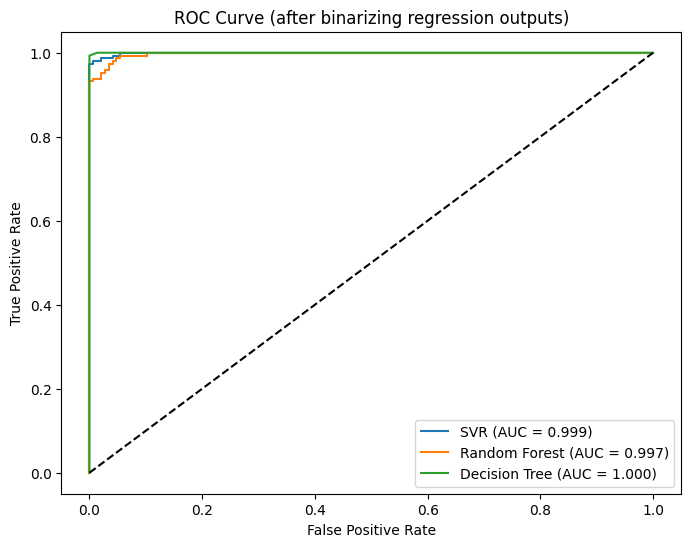

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
threshold = y_test.median()
plt.figure(figsize=(8,6))

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_true_bin = (y_test >= threshold).astype(int)
    y_pred_bin = (y_pred >= threshold).astype(int)
    fpr, tpr, _ = roc_curve(y_true_bin, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (after binarizing regression outputs)')
plt.legend()
plt.show()

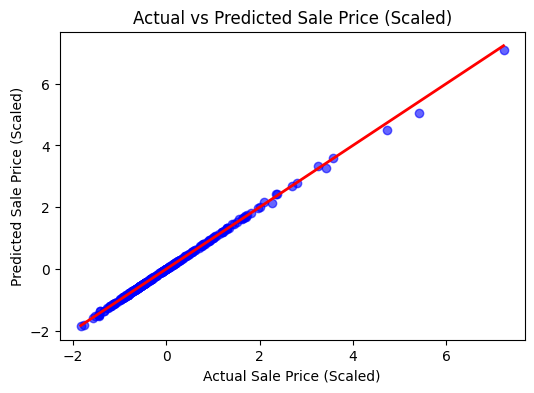

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Sale Price (Scaled)')
plt.ylabel('Predicted Sale Price (Scaled)')
plt.title('Actual vs Predicted Sale Price (Scaled)')
plt.show()

SVR is selected as the final model for this project.

# **PROJECT OVERVIEW**

The goal of this project is to predict house prices based on various property characteristics using advanced regression techniques.
The objective is to identify the key features influencing housing prices and build accurate predictive models to estimate property values effectively.


**Key Objectives**


Understand the main factors affecting house sale prices.

Build machine learning models that can predict prices accurately.

Support data-driven decision-making in the real estate market.

**Stage 1: Data Choosing & Understanding the Dataset**

Dataset:House Price Advanced Train Dataset (sourced from Kaggle)

**Description**

The dataset contains detailed records of residential homes in Ames, Iowa (USA), with more than 80 features describing various aspects of each property such as area, quality, and year built.

**Target Variable**

SalePrice — Represents the selling price of the house (in USD)

**Steps Performed**

Loaded dataset using pandas.

Checked data types, missing values, and duplicates.

Identified numerical and categorical columns.

Displayed dataset summary and initial statistics.

**Stage 2: EDA (Exploratory Data Analysis) & Pre-processing**

**Data Cleaning**

Replaced missing values using appropriate imputation (mean/median/mode).

Removed redundant columns and handled outliers to improve model stability.

**Exploratory Data Analysis**

Visualized numerical and categorical data using boxplot ,xticks , barplot , scatterplot , histplot , countplot , kdeplot and pairplot

Examined the relationship between key features and SalePrice.

Found that features such as Overall Quality, GrLivArea, and GarageCars have a strong positive correlation with house prices.

**Encoding & Transformation**

Applied One-Hot Encoding and Label Encoding to categorical variables.

Scaled numerical features using StandardScaler (essential for SVR)

**Stage 3: Feature Engineering & Model Building**

**Feature Engineering**

Encoded categorical data for model compatibility.

Applied feature scaling to normalize numerical columns.

Split the data into training and testing sets.

**Future Enhancements**

In the future, this project can be enhanced by implementing advanced ensemble learning algorithms such as XGBoost, LightGBM, or CatBoost to further improve predictive accuracy. Automated hyperparameter optimization techniques like GridSearchCV, RandomizedSearchCV, or Bayesian Optimization can be integrated to fine-tune the model efficiently. Additionally, more in-depth feature engineering can be performed by incorporating external factors such as location-based amenities, crime rates, and economic indicators to strengthen prediction quality.

The model can also be deployed as a real-time web application or Power BI dashboard, allowing continuous monitoring of housing market trends and supporting data-driven decision-making for buyers, sellers, and investors.

**Models Implemented**

Linear Regression

Decision Tree Regressor

Random Forest Regressor

Support Vector Regressor (SVR)

**Training & Optimization**

All models were trained using the training dataset.

Hyperparameter tuning was performed using GridSearchCV for improved performance

**Stage 4: Model Evaluation & Comparison**

**Evaluation Metrics Used**

R² Score

Root Mean Squared Error (RMSE)

Mean Absolute Error (MAE)

**FINAL PROJECT CONCLUSION**

After hyperparameter tuning & roc_curve , AUC , all models performed well, but SVR achieved the best overall performance with high accuracy and strong generalization ability.
Decision Tree is perfect scores but have overfitted the training data.
Random Forest showed near-perfect scores but may have slightly overfitted the training data.
Hence, SVR is selected as the final model for this project.